# Web Crawler

In [1]:
#Importing Libraries

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
import textblob

In [2]:
#Navigating the web browser

driver = webdriver.Chrome("D:/chromedriver")

In [3]:
#Scraping the news content

driver.get("https://www.ndtv.com/topic/news-portal")
content = driver.page_source
soup =BeautifulSoup(content)

In [4]:
#All the hyperlinks contained in the page
links = soup.find_all("a")
print("All the hyperlinks contained in the page : ")
for link in links:
    print(link.get("href"))

All the hyperlinks contained in the page : 
https://www.ndtv.com/
https://www.ndtv.com/business
https://khabar.ndtv.com/
https://movies.ndtv.com/
https://sports.ndtv.com/cricket
https://gadgets.ndtv.com/
https://www.ndtv.com/webstories?pfrom=home-header-globalnav
https://hop.live/?pfrom=home-header-globalnav
https://food.ndtv.com/
https://auto.ndtv.com
https://swachhindia.ndtv.com
https://swirlster.ndtv.com
https://doctor.ndtv.com/
https://www.ndtv.com/page/apps/
https://www.mojarto.com
https://www.ndtv.com/rss
https://www.ndtv.com/
https://www.ndtv.com/
https://www.ndtv.com/
#
https://www.ndtv.com/coronavirus
https://www.ndtv.com/video/live/channel/ndtv24x7
https://www.ndtv.com/latest
https://www.ndtv.com/india
https://www.ndtv.com/opinion
https://www.ndtv.com/cities
https://www.ndtv.com/world-news
https://www.ndtv.com/offbeat
https://www.ndtv.com/video
https://www.ndtv.com/trends
https://www.ndtv.com/tv-schedule
https://www.ndtv.com/education
https://www.ndtv.com/science
https://www.

In [5]:
#Creating lists to append each object
article=[]
combined=[]
news_portal=[]
description=[]

#Getting info through inspect from ndtv news portal link
for a in soup.findAll('li', attrs={'style':'padding: 5px;'}):
    
    articles=a.find('p', attrs={'class':'header fbld'})
    combine=a.find('p',attrs={'class':'list_dateline'})
    descriptions=a.find('p',attrs={'class':'intro'})

    article.append(articles.text)
    combined.append(combine.text)
    description.append(descriptions.text)
    
    #Creating a dataframe
    df=pd.DataFrame({'Article':article,'Combined_column':combined,'Description':description})

In [6]:
#display the first 5 elements
df.head()

,Article,Combined_column,Description
0,"Former Samata Party Chief, 2 Others Convicted ...",India News | Press Trust of India | Sunday Jul...,\n Former Samata Party ...
1,"""Corruption In Army Shakes Confidence"": Court ...",India News | Press Trust of India | Monday Sep...,\n Sentencing an 80-yea...
2,Supreme Court Allows News Portal To Withdraw P...,India News | Press Trust of India | Tuesday Au...,\n The Supreme Court on...
3,Adani Group To Withdraw Defamation Cases Again...,India News | Indo-Asian News Service | Wednesd...,\n The Adani Group is s...
4,Plea Seeks To Link Aadhaar With Social Media A...,India News | Indo-Asian News Service | Sunday ...,\n A Public Interest Li...


# EDA

In [7]:
#split the "Combined_column" into 3 new columns
df_split = df.Combined_column.str.split("|", n = 2, expand=True)
df['News_Portal'] = df_split[0]
df['Author'] = df_split[1]
df['Published'] = df_split[2]
df.head()

,Article,Combined_column,Description,News_Portal,Author,Published
0,"Former Samata Party Chief, 2 Others Convicted ...",India News | Press Trust of India | Sunday Jul...,\n Former Samata Party ...,India News,Press Trust of India,"Sunday July 26, 2020"
1,"""Corruption In Army Shakes Confidence"": Court ...",India News | Press Trust of India | Monday Sep...,\n Sentencing an 80-yea...,India News,Press Trust of India,"Monday September 16, 2019"
2,Supreme Court Allows News Portal To Withdraw P...,India News | Press Trust of India | Tuesday Au...,\n The Supreme Court on...,India News,Press Trust of India,"Tuesday August 27, 2019"
3,Adani Group To Withdraw Defamation Cases Again...,India News | Indo-Asian News Service | Wednesd...,\n The Adani Group is s...,India News,Indo-Asian News Service,"Wednesday May 22, 2019"
4,Plea Seeks To Link Aadhaar With Social Media A...,India News | Indo-Asian News Service | Sunday ...,\n A Public Interest Li...,India News,Indo-Asian News Service,"Sunday April 28, 2019"


In [8]:
#drop the "Combined_column" column
df = df.drop(['Combined_column'], axis=1)
df = df.dropna()

In [9]:
#clean the columns by removing '\n'
df["Description"] = df["Description"].str.replace('\n', '')
df["News_Portal"] = df["News_Portal"].str.replace('\n', '')

In [10]:
#display the first 10 elements
df.head(10)

,Article,Description,News_Portal,Author,Published
0,"Former Samata Party Chief, 2 Others Convicted ...",Former Samata Party pr...,India News,Press Trust of India,"Sunday July 26, 2020"
1,"""Corruption In Army Shakes Confidence"": Court ...",Sentencing an 80-year-...,India News,Press Trust of India,"Monday September 16, 2019"
2,Supreme Court Allows News Portal To Withdraw P...,The Supreme Court on T...,India News,Press Trust of India,"Tuesday August 27, 2019"
3,Adani Group To Withdraw Defamation Cases Again...,The Adani Group is set...,India News,Indo-Asian News Service,"Wednesday May 22, 2019"
4,Plea Seeks To Link Aadhaar With Social Media A...,A Public Interest Liti...,India News,Indo-Asian News Service,"Sunday April 28, 2019"
5,"Postcard News Co-Founder Arrested Again, Charg...","Mahesh Vikram Hegde, a...",India News,Edited by Stela Dey,"Wednesday April 24, 2019"
7,"Bangladesh Briefly Shuts 58 Online News Sites,...",Bangladesh's telecoms ...,World News,Reuters,"Monday December 10, 2018"
8,"""Trumped Up Charge"", Says Media Owner Raghav B...",Leading media owner Ra...,India News,Edited by Anindita Sanyal,"Friday October 12, 2018"
9,"Media Owner Raghav Bahl's Noida Home, 'The Qui...",Leading media owner Ra...,India News,Edited by Deepshikha Ghosh,"Thursday October 11, 2018"
10,"Amid Protests, Bangladesh Arrests 23 For Alleg...",Bangladesh police have...,World News,Press Trust of India,"Friday August 10, 2018"


In [11]:
#split the 'Published' day-time column into 2 new columns as 'Day' and 'Date'
df_split_dates = df.Published.str.split(" ", n = 2, expand=True)
df['Day'] = df_split_dates[1]
df['Date'] = df_split_dates[2]

df.head()

,Article,Description,News_Portal,Author,Published,Day,Date
0,"Former Samata Party Chief, 2 Others Convicted ...",Former Samata Party pr...,India News,Press Trust of India,"Sunday July 26, 2020",Sunday,"July 26, 2020"
1,"""Corruption In Army Shakes Confidence"": Court ...",Sentencing an 80-year-...,India News,Press Trust of India,"Monday September 16, 2019",Monday,"September 16, 2019"
2,Supreme Court Allows News Portal To Withdraw P...,The Supreme Court on T...,India News,Press Trust of India,"Tuesday August 27, 2019",Tuesday,"August 27, 2019"
3,Adani Group To Withdraw Defamation Cases Again...,The Adani Group is set...,India News,Indo-Asian News Service,"Wednesday May 22, 2019",Wednesday,"May 22, 2019"
4,Plea Seeks To Link Aadhaar With Social Media A...,A Public Interest Liti...,India News,Indo-Asian News Service,"Sunday April 28, 2019",Sunday,"April 28, 2019"


In [12]:
#drop the 'Published' column
df = df.drop(columns=['Published'])

In [13]:
#Check the format/Dtype of 'Date'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Article      28 non-null     object
 1   Description  28 non-null     object
 2   News_Portal  28 non-null     object
 3   Author       28 non-null     object
 4   Day          28 non-null     object
 5   Date         28 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [14]:
#convert the date column object into datetime64 format
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
#Now Check the format/Dtype of 'Date'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Article      28 non-null     object        
 1   Description  28 non-null     object        
 2   News_Portal  28 non-null     object        
 3   Author       28 non-null     object        
 4   Day          28 non-null     object        
 5   Date         28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.5+ KB


In [16]:
#set the index as 'Date'
df = df.set_index('Date')
df.head()

,Article,Description,News_Portal,Author,Day
Date,,,,,
2020-07-26,"Former Samata Party Chief, 2 Others Convicted ...",Former Samata Party pr...,India News,Press Trust of India,Sunday
2019-09-16,"""Corruption In Army Shakes Confidence"": Court ...",Sentencing an 80-year-...,India News,Press Trust of India,Monday
2019-08-27,Supreme Court Allows News Portal To Withdraw P...,The Supreme Court on T...,India News,Press Trust of India,Tuesday
2019-05-22,Adani Group To Withdraw Defamation Cases Again...,The Adani Group is set...,India News,Indo-Asian News Service,Wednesday
2019-04-28,Plea Seeks To Link Aadhaar With Social Media A...,A Public Interest Liti...,India News,Indo-Asian News Service,Sunday


In [17]:
#arrange the columns
df = df[['Day', 'Article', 'News_Portal', 'Author', 'Description']]

In [18]:
#Remove the exta spaces from the 'Description' column
df['Description'] = df['Description'].apply(lambda a: re.sub(' +',' ',a))

In [19]:
#Description of the news of each article
for i,text in enumerate(df['Description']):
  print('News Information {0}: \n{1}\n'.format((i+1),text))

News Information 1: 
 Former Samata Party president Jaya Jaitly and two others have been convicted by a court in New Delhi in a nearly 20-year-old graft case related to a purported defence deal that stemmed from a sensational sting operation by Tehelka news portal. 

News Information 2: 
 Sentencing an 80-year-old retired Major General to three years' rigorous imprisonment in a bribery case that stemmed from a 2001 sting operation by Tehelka news portal, a court here observed that corruption in Indian Army shakes the very confidence of the society and the culprit should be appropriately punished. 

News Information 3: 
 The Supreme Court on Tuesday allowed news portal The Wire and its journalists to withdraw their appeal against the Gujarat High Court order in a defamation case filed by Jay Shah, son of Union Home Minister Amit Shah, over an article, even as it expressed anguish over the way journalism is being practised in the country. 

News Information 4: 
 The Adani Group is set to

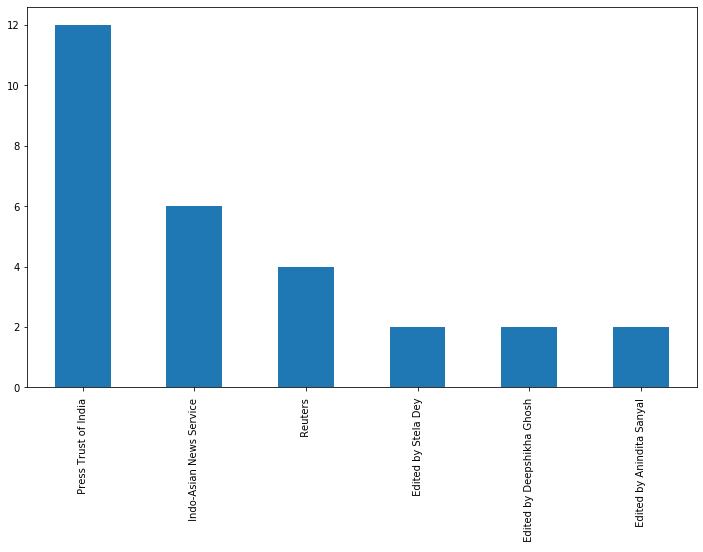

In [20]:
#distribution of unique Authors
df.Author.value_counts().plot.bar(figsize =(12, 7))

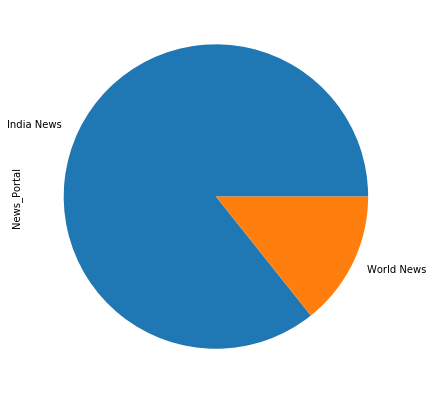

In [21]:
#distribution of unique news-portals
df.News_Portal.value_counts().plot.pie(figsize=(12, 7))

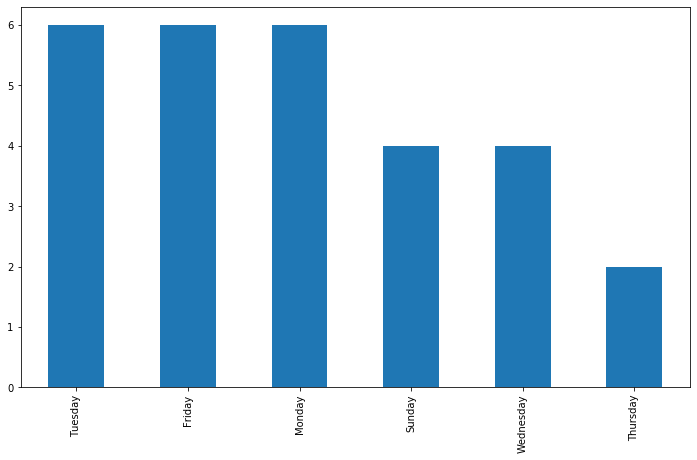

In [22]:
#day-wise published news count
df.Day.value_counts().plot.bar( figsize=(12, 7))

In [23]:
#All th articles contained in the web page
for i,text in enumerate(df['Article']):
  print('Article Headline {0}: \n{1}\n'.format((i+1),text))

Article Headline 1: 
Former Samata Party Chief, 2 Others Convicted In Corruption Case

Article Headline 2: 
"Corruption In Army Shakes Confidence": Court At Ex-Army Man's Sentencing

Article Headline 3: 
Supreme Court Allows News Portal To Withdraw Plea In Case Filed By Amit Shah's Son

Article Headline 4: 
Adani Group To Withdraw Defamation Cases Against "The Wire"

Article Headline 5: 
Plea Seeks To Link Aadhaar With Social Media Accounts To Curb Fake News

Article Headline 6: 
Postcard News Co-Founder Arrested Again, Charged With Spreading Fake News

Article Headline 7: 
Bangladesh Briefly Shuts 58 Online News Sites, Due To Security Concerns

Article Headline 8: 
"Trumped Up Charge", Says Media Owner Raghav Bahl After Tax Raids

Article Headline 9: 
Media Owner Raghav Bahl's Noida Home, 'The Quint' Office Raided By Taxmen

Article Headline 10: 
Amid Protests, Bangladesh Arrests 23 For Allegedly Spreading Rumours

Article Headline 11: 
Top Court Extends Stay On Proceedings In Jay Sha

In [24]:
#daily fequency of published articles
Daily_Frequency=df.Day.value_counts()
Daily_Frequency

Tuesday      6
Friday       6
Monday       6
Sunday       4
Wednesday    4
Thursday     2
Name: Day, dtype: int64

In [25]:
#saving as a CSV file
df.to_csv('News.csv')